# Prespective Homography using OpenCV

In [2]:
#import library yang digunakan
import cv2
import numpy as np
import matplotlib.pylab as plt

In [3]:
#mendifinisikan variabel untuk menyimpan koordinat dimana gambar kedua harus ditempatkan
posisi=[] 
posisi2=[]
count=0

In [4]:
#Fungsi untuk menyatakan titik pada fungsi mouse callback
def draw_circle(event,x,y,flags,param):
    global posisi,count
    #Jika Klik Tombol Kiri maka akan menyimpan koordinat dalam variabel posisi and posisi2
    if event == cv2.EVENT_LBUTTONUP:
        cv2.circle(destination,(x,y),10,(0,0,255),-1)
        posisi.append([x,y])
        if(count!=3):
            posisi2.append([x,y])
        elif(count==3):
            posisi2.insert(2,[x,y])
        count+=1

In [5]:
#Membaca dua gambar dan menyimpannya di variabel destination dan source
destination = cv2.imread('baliho.jpg')
source = cv2.imread('netflix.jpg')

In [6]:
#Mendefinisikan Windows untuk menjalankan fungsi draw circle
cv2.namedWindow('Masukkan 4 Titik')
##A B
##C D
cv2.setMouseCallback('Masukkan 4 Titik',draw_circle)
while(True):
    cv2.imshow('Masukkan 4 Titik',destination)
    k = cv2.waitKey(20) & 0xFF
    if k == 27 or count == 4:
        break

cv2.destroyAllWindows()

In [7]:
#menentukan variabel tinggi dan lebar untuk destination dan source
height, width = destination.shape[:2]
h1,w1 = source.shape[:2]

#koordinat pada destination
pts1=np.float32([[0,0],[w1,0],[0,h1],[w1,h1]])
#koordinat untuk posisi source
pts2=np.float32(posisi)

#mencari homography pada point 1 dan point 2
h, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC,5.0)

#merlakukan warp perspective pada gambar destination ke source
height, width, channels = destination.shape
im1Reg = cv2.warpPerspective(source, h, (width, height))

#melakukan mask pada gambar
mask2 = np.zeros(destination.shape, dtype=np.uint8)

roi_corners2 = np.int32(posisi2)

channel_count2 = destination.shape[2]  
ignore_mask_color2 = (255,)*channel_count2

cv2.fillConvexPoly(mask2, roi_corners2, ignore_mask_color2)

mask2 = cv2.bitwise_not(mask2)
masked_image2 = cv2.bitwise_and(destination, mask2)

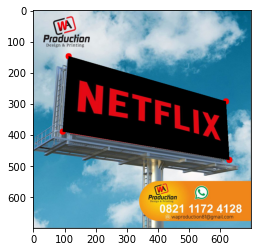

In [8]:
#Menggunakan Bitwise atau untuk menggabungkan dua gambar
final = cv2.bitwise_or(im1Reg, masked_image2)

#membuat file png
cv2.imwrite('final.png',final)

#menampilkan hasil final
final = cv2.cvtColor(final, cv2.COLOR_BGR2RGB)
plt.imshow(final)